# Homework 03 - kMeans
## 如何将下列数据进行特征变换之后，做kMeans聚类
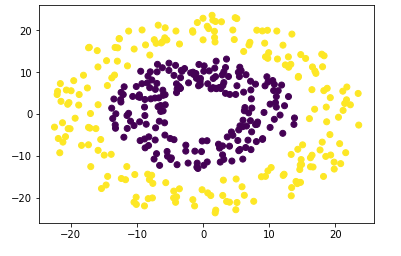
数据文件是：`dataset_circles.csv`  
要求：  
1.不使用特征变化，使用聚类方法得到的结果；  
2.使用特征变化，使用聚类方法的结果；  
3.自己查找其他的聚类方法，尝试使用一下，看看效果如何。

### 1.不使用特征变化，使用聚类算法得到的结果

#### 1) 导入所需库

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import math

#### 2) 读取数据
给数据csv文件中的数据加入表头，分别是：x、y、class
将新的数据存放到另一个数据文件`dataset_circles_new.csv`中。

In [2]:
#读取数据
#读取'dataset_circles.csv'中的数据，加上表头
df = pd.read_csv('dataset_circles.csv',header=None,names=['x','y','class'])
#把加上表头的数据存放到另一个csv文件'dataset_circles_new.csv'中
df.to_csv('dataset_circles_new.csv',index=False)
#读取'dataset_circles_new.csv'中的数据
dfc = pd.read_csv('dataset_circles_new.csv')#不能加“,header=0,index_col=0”，非则会出现KeyError: 'x'

【注】在加入表头的语句中不可以使用`header=0,index_col=0`。否则，保存在`dataset_circles_new.csv`中的数据就只有y和class，x不见了。

#### 3) 将读取的数据可视化

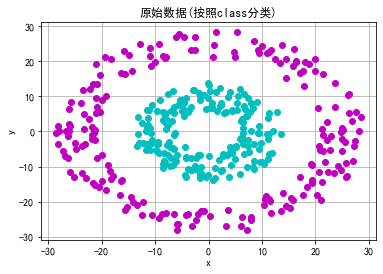

In [3]:
#可视化数据
#title中显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#可视化函数
def visualizeDataset(dfc,form1='co',form2='mo'):
    plt.figure()
    for i in range(np.shape(dfc)[0]):
        if dfc['class'][i] == 0.0:
            plt.plot(dfc['x'][i],dfc['y'][i],form1)
        else:
            plt.plot(dfc['x'][i],dfc['y'][i],form2)
    plt.title('原始数据(按照class分类)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
visualizeDataset(dfc)


#### 4) KMeans聚类

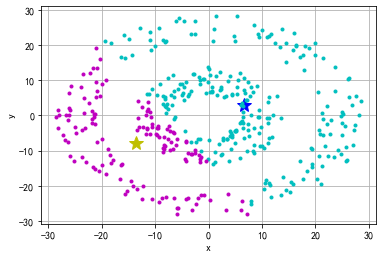

AttributeError: 'KMeans' object has no attribute 'count'

In [4]:
class KMeans():
    
    def __init__(self, data, k=2):
        self.color = 'cmbyrkw'  #绘图颜色
        self.k = k #分为几类
        self.data = data #保存数据
        self.points = np.array([dfc['x'],dfc['y']]).T 
        self.clusters = {key:[]for key in range(self.k)}
        self.centroids = random.sample(list(self.points),k) #随机重心
    
    #欧式距离
    def __distance(self,point1,point2):
        #return np.sqrt(np.array(point1) - np.array(point2).sum())
        return math.sqrt(np.sum(np.power(point1-point2,2)))

    #计算重心
    def __calc_centroids(self,points):
        np_points = np.array(points)
        return np_points.mean(axis=0)

    #可视化绘图
    def __drawpoints(self,index,cluster,props='r*'):
        #绘制重心
        plt.plot(self.centroids[index][0],self.centroids[index][1],'*',c=self.color[index+2],ms=14)#index+2是为了让重心的颜色和其他点的颜色不一样，否则难以观察
        np_cluster = np.array(cluster)  # 转成numpy数组，方便绘图
        plt.plot(np_cluster[:,0],np_cluster[:,1],props) #绘图
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)

    #计算是否满足停止条件
    def __stopable(self,index_list,index_list_his):
        self.count = self.count+1 #每迭代一次，做一次检查
        if len(index_list)!=len(index_list_his):
            return False
        np_index_list = np.array(index_list)
        np_index_list_his = np.array(index_list_his)
        return not np.any(np_index_list-np_index_list_his)

    #生成簇
    def __cluster(self):
        min_index_list = []
        while True:
            #清空点集，重新归类
            del self.clusters
            self.clusters = {key:[] for key in range(self.k)}
            min_index_list_his = min_index_list
            min_index_list = []
            for point in self.points:
            #for point in np.shape(self.points)[0]:
                # 计算所有点和重心距离，存入distance_array
                dis = np.zeros(self.k)
                for i in range(self.k):
                    dis[i] = self.__distance(self.centroids[i], point)
                    #dis[i] = self.__distance(self.centroids[i], points[point][0],points[point][1])

                # 找出最小值的索引
                min_index = np.argmin(dis)
                min_index_list.append(min_index)
                # 按最小索引分类
                self.clusters[min_index].append(point)

            # 清空当前重心
            self.centroids.clear()
            # 重新计算新的重心
            for i in range(self.k):
                self.centroids.append(self.__calc_centroids(self.clusters[i]))
                # 绘图，可视化
                self.__drawpoints(i, self.clusters[i], props=self.color[i]+'.')
            plt.show()

            # 若无点的索引变化，则退出聚类循环
            if self.__stopable(min_index_list, min_index_list_his):
                return
    
    #返回最终结果
    def result(self):
        self.__cluster()

k=2
re = KMeans(data=dfc,k=k)
re.result()
#print('迭代了',re.count,'次')

【注】没有进行特征变化，聚类的方法仅是根据点与点之间的最小距离分出的两类，不能实现我们想要的环状分类的结果。因此，不能直接只用聚类方法。

### 2.使用特征变化，使用聚类算法得到的结果

原点在两个环状点集的中心处(红色五角星)，可以将各个点到原点的距离作为聚类的依据。可以表示某一点到原点的距离的坐标表示是极坐标。

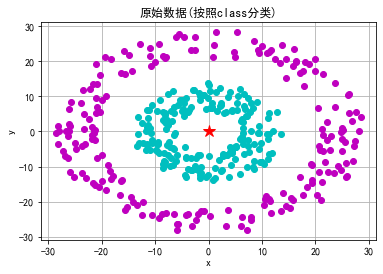

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def visualizeDataset(dfc,form1='co',form2='mo'):
    plt.figure()
    plt.plot(0,0,'r*',ms=12.0)
    for i in range(np.shape(dfc)[0]):
        if dfc['class'][i] == 0.0:
            plt.plot(dfc['x'][i],dfc['y'][i],form1)
        else:
            plt.plot(dfc['x'][i],dfc['y'][i],form2)
    plt.title('原始数据(按照class分类)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
visualizeDataset(dfc)

#### 1) 导入所需库
同上

In [6]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import math

#### 2) 读取数据
不加表头了，不妨碍后续处理。

In [7]:
df = pd.read_csv("dataset_circles.csv",header=None)

#### 3) 坐标变换和距离计算（两个函数）

In [8]:
def coordinate_change(data):
    m = np.shape(data)[0]
    dff=pd.DataFrame(np.random.randn(400,2))
    for i in range(m):
       r = np.sqrt((data.iloc[i][0]**2) + (data.iloc[i][1]**2))  #距离r，坐标的第一个参数
       theta = np.math.atan(data.iloc[i][1]/data.iloc[i][0]) #角度theta角，坐标的第二个参数
       dff.iloc[i, :2] = r, theta
    return dff

def distance(point1,point2):
    return math.sqrt(np.sum(np.power(point1-point2,2)))

#### 4) 初始化聚类中心
随机抽取聚类中心，样本中心数目和聚类数相同。

In [9]:
def init(data,k):
    m = np.shape(data)[0] #样本数
    dataindex = list(range(m)) #样本索引
    centerindex = random.sample(dataindex,k) #从列表中随机选择k个元素
    centerpoint = data.iloc[centerindex]
    k = np.mat(centerpoint)
    return k

#### 5) 特征变化后的KMeans聚类

In [10]:
def KMeans(data,k):
   m = np.shape(data)[0]  #样本数量
   cluster = np.mat(np.zeros((m,2)))
   centerpoint = init(data,k)  #初始化聚类中心
   changed = True 
   while changed:
       changed = False
       for i in range(m):
           dist = np.inf  #设置初始距离
           index = -1  #初始化索引值
           for j in range(k):
               dist_1 = distance(centerpoint[j,:],data.values[i,:])
               if dist_1 < dist:
                   dist = dist_1
                   index = j
           if cluster[i,0]!=index:
              changed = True
           cluster[i,:] = index,dist**2
        
       for i in range(k):
           pts = data.iloc[np.nonzero(cluster[:,0].A==i)[0]] 
           centerpoint[i,:] = np.mean(pts,axis=0)
   return cluster

#### 6) 聚类结果可视化

In [11]:
def result_show(data,result):
    plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure()
    color = 'cmbyrkw'
    m = np.shape(data)[0]
    for i in range (m):
        a = int(result[i,0])
        plt.scatter(data.iat[i,0], data.iat[i,1], color=color[a])
    plt.title("极坐标聚类结果")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

k=2


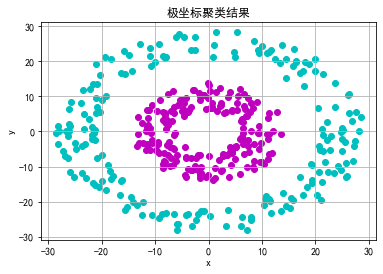

In [12]:
k=int(input('k='))
data = coordinate_change(df)
class_result = KMeans(data,k)
result_show(df,class_result)

k=3


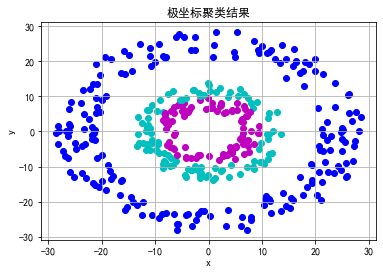

In [13]:
k=int(input('k='))
data = coordinate_change(df)
class_result = KMeans(data,k)
result_show(df,class_result)

k=3


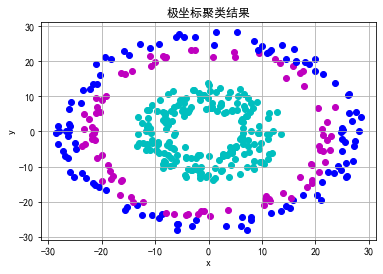

In [15]:
k=int(input('k='))
data = coordinate_change(df)
class_result = KMeans(data,k)
result_show(df,class_result)

k=4


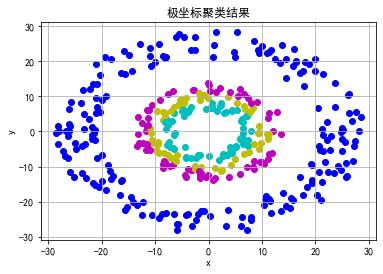

In [16]:
k=int(input('k='))
data = coordinate_change(df)
class_result = KMeans(data,k)
result_show(df,class_result)

从原始数据可视化结果可知，数据大致分为两类。因此，k=2时可以的到较好的聚类结果。  
若k>=3，则每次聚类结果具有随机性，和初始的聚类中心有关。

### 3.Spectral Clustering（谱聚类）
#### 1) 基本思路
将样本看作顶点，样本间的相似度看作带权的边，从而将聚类问题转为图分割问题：找到一种图分割的方法使得连接不同组的边的权重尽可能低(这意味着组间相似度要尽可能低)，组内的边的权重尽可能高(这意味着组内相似度要尽可能高)。
#### 2)图解
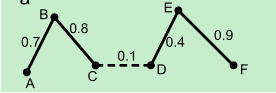
#### 3)核心函数&主要参数
sklearn.cluster.SpectralClustering(n_clusters,affinity,gamma)  
a) n_clusters：聚类的个数；  
b) affinity：核函数，默认是"rbf"，可选："nearest_neighbors"，"precomputed","rbf"或   sklearn.metrics.pairwise_kernels支持的其中一个内核之一；  
c) gamma :affinity指定的核函数的内核系数，默认1.0。

k=2


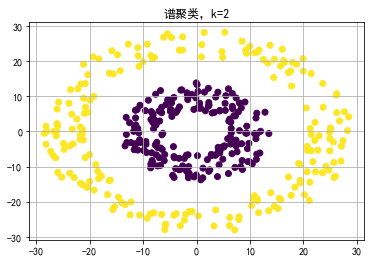

In [17]:
#1)导入所需库
from sklearn import datasets
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#2) 在plt.title中显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#3) 输入聚类数目
k=int(input('k='))

#4) 读取并处理数据
df = pd.read_csv('dataset_circles.csv',header=None,names=['x','y','class'])#读取数据，加上表头
df.to_csv('dataset_circles_new.csv',index=False)#把加上表头的数据放到一个新的csv文件中
dff = pd.read_csv('dataset_circles_new.csv',usecols=['x', 'y'])#只读取x、y坐标，不读取类别"class"
dff.to_csv('dataset_circles_new.csv',index=False)#重新保存除去类别的文件
dfd = np.loadtxt(open("dataset_circles_new.csv","rb"),delimiter=",",skiprows=1)#以数组的形式读取数据，方便后续处理

#5) 谱聚类
X = []#空list，用来放置所有点的横坐标
y = []#空list，用来放置所有点的纵坐标
for p in dfd:
    X.append(p[0])
    y.append(p[1])

sc = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
sc_clusters2 = sc.fit_predict(dfd)

#6) 可视化
plt.scatter(X,y, c=sc_clusters2)
plt.title("谱聚类，k=2")
plt.grid(True)
plt.show()

k为其他值时，聚类的结果如下：

k=3


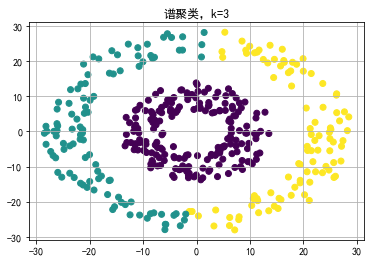

In [18]:
k=int(input('k='))
sc = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
sc_clusters2 = sc.fit_predict(dfd)
plt.scatter(X,y, c=sc_clusters2)
plt.title("谱聚类，k=3")
plt.grid(True)
plt.show()

k=4


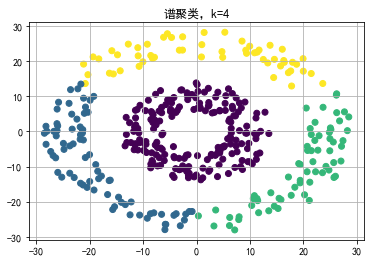

In [19]:
k=int(input('k='))
sc = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
sc_clusters2 = sc.fit_predict(dfd)
plt.scatter(X,y, c=sc_clusters2)
plt.title("谱聚类，k=4")
plt.grid(True)
plt.show()

### 4.Agglomerative Clustering（层次聚类）
#### 核心函数&主要参数
sklearn.cluster.SpectralClustering(n_clusters,affinity,gamma)  
a) n_clusters：聚类的个数；   
b) affinity：用于计算linkage的度量。“euclidean”:欧几里得距离(如果linkage 是       “ward”, 则affinity只可选为此选项) ，“l1”，“l2”；  
c) linkage：连接方法——ward（方差最小化）complete（两组中所有观测值间的最大距离）   average（平均距离）single（最小距离）。

k=2


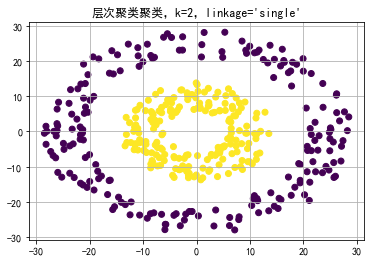

In [20]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('dataset_circles.csv',header=None,names=['x','y','class'])#读取数据，加上表头
df.to_csv('dataset_circles_new.csv',index=False)#把加上表头的数据放到一个新的csv文件中
dff = pd.read_csv('dataset_circles_new.csv',usecols=['x', 'y'])#只读取x、y坐标，不读取类别"class"
dff.to_csv('dataset_circles_new.csv',index=False)#重新保存除去类别的文件
dfd = np.loadtxt(open("dataset_circles_new.csv","rb"),delimiter=",",skiprows=1)#以数组的形式读取数据，方便后续处理

X = []#空list，用来放置所有点的横坐标
y = []#空list，用来放置所有点的纵坐标
for p in dfd:
    X.append(p[0])
    y.append(p[1])

# 输入聚类数目
k=int(input('k='))

# 层次聚类
sc = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='single')
sc_clusters2 = sc.fit_predict(dfd)#
plt.grid(True)
plt.scatter(X,y, c=sc_clusters2)
plt.title("层次聚类聚类，k=2，linkage='single'")
plt.show()

【注】以上聚类选择的linkage是single。如果选择其他，则无法得到正确的环状聚类结果。

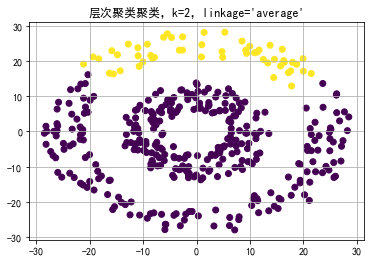

In [21]:
k=2
sc = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
sc_clusters2 = sc.fit_predict(dfd)#
plt.scatter(X,y, c=sc_clusters2)
plt.title("层次聚类聚类，k=2，linkage='average'")
plt.grid(True)
plt.show()

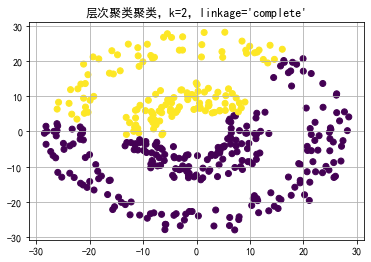

In [22]:
k=2
sc = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
sc_clusters2 = sc.fit_predict(dfd)#
plt.scatter(X,y, c=sc_clusters2)
plt.title("层次聚类聚类，k=2，linkage='complete'")
plt.grid(True)
plt.show()

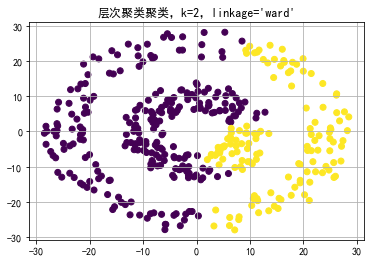

In [23]:
k=2
sc = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
sc_clusters2 = sc.fit_predict(dfd)#
plt.scatter(X,y, c=sc_clusters2)
plt.title("层次聚类聚类，k=2，linkage='ward'")
plt.grid(True)
plt.show()